# Importing libraries

## Basics

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

## EDA and preprocessing

In [61]:
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import IsolationForest

## Cross validation

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

## Models

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.linear_model import LogisticRegression

## Metrics

In [64]:
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_auc_score as auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Exploratory data analysis

Previously we loaded the data and created a sample out of it.

In [ ]:
#gtd_ori = pd.read_excel("globalterrorismdb_0617dist.xlsx")

In [168]:
# Because the dataset is highly imbalanced, I tried to get a stratified sample, but was unable to do so.
#stsmp = train_test_split(gtd_ori, train_size=0.25, startify=['gname'])
#stsmp.to_excel("stsmp.xlsx")
#gtd = pd.read_excel("stsmp.xlsx")

#smp = gtd_ori.sample(frac=0.25, random_state=4721)
#smp.to_excel("sample.xlsx")
gtd = pd.read_excel("sample.xlsx")

TypeError: Invalid parameters passed: {'startify': ['gname']}

In [8]:
gtd.info(verbose=True, null_counts=True, max_cols=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42588 entries, 145918 to 94344
Data columns (total 135 columns):
eventid               42588 non-null int64
iyear                 42588 non-null int64
imonth                42588 non-null int64
iday                  42588 non-null int64
approxdate            1876 non-null object
extended              42588 non-null int64
resolution            560 non-null datetime64[ns]
country               42588 non-null int64
country_txt           42588 non-null object
region                42588 non-null int64
region_txt            42588 non-null object
provstate             38954 non-null object
city                  42485 non-null object
latitude              41454 non-null float64
longitude             41454 non-null float64
specificity           42587 non-null float64
vicinity              42588 non-null int64
location              11964 non-null object
summary               26054 non-null object
crit1                 42588 non-null int64
crit2 

### Column data types and the number of unique values in them.

In [9]:
uniques = gtd.nunique()
types = gtd.dtypes

In [10]:
atts = pd.concat([uniques, types], axis=1)
#atts.rename(columns=['types', 'uniques'], inplace=True)
atts.columns = ['uniques', 'types']

for coltype in atts.types.unique():
    clist = atts[atts.types == coltype].sort_values(by='uniques', ascending=False)
    print("\n{}:\n\n{}\n".format(coltype, clist.uniques))


int64:

eventid        42588
country          183
iyear             46
iday              32
targtype1         22
imonth            13
region            12
weaptype1         12
attacktype1        9
INT_MISC           3
INT_IDEO           3
INT_LOG            3
property           3
INT_ANY            3
doubtterr          3
vicinity           3
suicide            2
success            2
individual         2
crit3              2
crit2              2
crit1              2
extended           2
multiple           2
Name: uniques, dtype: int64


object:

summary               25703
target1               23296
scite1                22616
scite2                15947
city                  13031
location              10912
corp1                  9994
scite3                 9069
weapdetail             5795
propcomment            5587
related                5386
addnotes               4251
motive                 3874
gname                  1710
provstate              1625
target2                1364


## Attribute domain categories

Based on the GTD Codebook (adjusted with own analysis), the dataset consists of the following attribute groups:
1. Time
2. Location
3. Incident
4. Attack
5. Perpetrators
6. Perpetrator validity
7. Weapon
8. Target
9. Casualties and consequences
10. Additional information

In [11]:
att_time = ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution']
att_loc = ['country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity','vicinity', 'location']
att_incid = ['summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'related']
att_attack = ['success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt']
att_perp = ['gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3']
att_perval = ['motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim']
att_weap = ['weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'weapdetail']
att_targ = ['targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt']
att_cons = ['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased']
att_info = ['addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',]

### From among these, the 'att_perp' group contains the target variable(s).

## Perpetrator names

In [12]:
gtd[att_perp].sample(10)

,gname,gsubname,gname2,gsubname2,gname3,gsubname3
142383,Unknown,NaN,NaN,NaN,NaN,NaN
9161,Unknown,NaN,NaN,NaN,NaN,NaN
430,"Weather Underground, Weathermen",NaN,NaN,NaN,NaN,NaN
4702,Basque Fatherland and Freedom (ETA),NaN,NaN,NaN,NaN,NaN
8095,Armed Squads for Communism,NaN,NaN,NaN,NaN,NaN
79076,Unknown,NaN,NaN,NaN,NaN,NaN
74891,Palestinian Islamic Jihad (PIJ),NaN,NaN,NaN,NaN,NaN
48532,Dev Sol,NaN,NaN,NaN,NaN,NaN
64804,Institutional Revolutionary Party (PRI),NaN,NaN,NaN,NaN,NaN
15885,Unknown,NaN,NaN,NaN,NaN,NaN


### Number of incidents per groups

More than 45% of the  perpetrators are unknown:

In [16]:
gtd.gname.value_counts(normalize=True).head(1)

Unknown    0.460975
Name: gname, dtype: float64

In [153]:
known = gtd[gtd.gname != 'Unknown']

###  Distribution of incidents among groups

The proportion of recognized groups responsible only for a single incident:

In [178]:
len(known.gname.value_counts()[known.gname.value_counts() <= 1]) / len(known)

0.03859557414183656

The distribution of incidents among the known groups:

In [154]:
inc_grp = known.gname.value_counts()
print(inc_grp)

Taliban                                                          1615
Islamic State of Iraq and the Levant (ISIL)                      1108
Shining Path (SL)                                                1087
Farabundo Marti National Liberation Front (FMLN)                  812
Al-Shabaab                                                        688
Irish Republican Army (IRA)                                       683
Revolutionary Armed Forces of Colombia (FARC)                     617
New People's Army (NPA)                                           607
Kurdistan Workers' Party (PKK)                                    563
Boko Haram                                                        519
Basque Fatherland and Freedom (ETA)                               512
Communist Party of India - Maoist (CPI-Maoist)                    430
Liberation Tigers of Tamil Eelam (LTTE)                           400
National Liberation Army of Colombia (ELN)                        365
Maoists             

Around a fifth  of the groups is responsible for 90% of all _known_ incidents and 40% of them for 95%.

In [67]:
len(inc_grp_csum[inc_grp_csum <= 0.90]) / len(gtd.gname.unique())

0.1976608187134503

In [179]:
len(inc_grp_csum[inc_grp_csum <= 0.95]) / len(gtd.gname.unique())

0.4046783625730994

In [155]:
inc_grp_csum = known.gname.value_counts(normalize=True).cumsum()
inc_grp_csum

Taliban                                                          0.070352
Islamic State of Iraq and the Levant (ISIL)                      0.118618
Shining Path (SL)                                                0.165970
Farabundo Marti National Liberation Front (FMLN)                 0.201342
Al-Shabaab                                                       0.231312
Irish Republican Army (IRA)                                      0.261065
Revolutionary Armed Forces of Colombia (FARC)                    0.287942
New People's Army (NPA)                                          0.314384
Kurdistan Workers' Party (PKK)                                   0.338909
Boko Haram                                                       0.361518
Basque Fatherland and Freedom (ETA)                              0.383821
Communist Party of India - Maoist (CPI-Maoist)                   0.402553
Liberation Tigers of Tamil Eelam (LTTE)                          0.419977
National Liberation Army of Colombia (

### Second and third groups

The database also records second and third groups but only for around 1% of the total incidents:

In [200]:
names = known.loc[:, ['gname', 'gname2', 'gname3']]

In [201]:
names.count() / len(known)

gname     1.000000
gname2    0.019603
gname3    0.002701
dtype: float64

In [202]:
names.apply(lambda x: x.value_counts(dropna=False)).sort_values(by='gname', ascending=False)

,gname,gname2,gname3
Taliban,1615.0,8.0,NaN
Islamic State of Iraq and the Levant (ISIL),1108.0,7.0,5.0
Shining Path (SL),1087.0,NaN,NaN
Farabundo Marti National Liberation Front (FMLN),812.0,NaN,NaN
Al-Shabaab,688.0,1.0,NaN
Irish Republican Army (IRA),683.0,NaN,NaN
Revolutionary Armed Forces of Colombia (FARC),617.0,10.0,NaN
New People's Army (NPA),607.0,4.0,NaN
Kurdistan Workers' Party (PKK),563.0,3.0,NaN
Boko Haram,519.0,3.0,1.0


### Subnames

The database also records subnames for perpetrators for around 3% of the perpetrators.

In [129]:
sub_names = gtd.loc[:,['gsubname', 'gsubname2', 'gsubname3']].dropna(how='all').groupby(by=gtd.loc[:,'gname']).count()

In [134]:
sub_names.sum() / len(gtd)

gsubname     0.030149
gsubname2    0.000892
gsubname3    0.000047
dtype: float64

In [132]:
sub_names.sort_values(by='gsubname', ascending=False)

,gsubname,gsubname2,gsubname3
gname,,,
Farabundo Marti National Liberation Front (FMLN),123,0,0
Revolutionary Armed Forces of Colombia (FARC),107,1,0
Sikh Extremists,101,0,0
Islamic State of Iraq and the Levant (ISIL),56,4,0
New People's Army (NPA),53,0,0
Tehrik-i-Taliban Pakistan (TTP),36,0,0
Tamils,35,0,0
Kurdistan Workers' Party (PKK),34,1,0
Chechen Rebels,32,0,0


### Suspected perpetrators

Around 15% of perpetrator information is in a 'suspected' status.

In [203]:
guncertcols = gtd.loc[:, ['guncertain1','guncertain2','guncertain3']]

In [204]:
guncertcols[guncertcols == 1].dropna(how='all').count() / len(known)

guncertain1    0.154469
guncertain2    0.005184
guncertain3    0.000697
dtype: float64

On the other hand, the coding book is not clear about what exactly the '1' of 'uncertainty' value means compared to the '0' and 'NaN' values.

In [205]:
guncertcols.apply(lambda x: x.value_counts(dropna=False))

,guncertain1,guncertain2,guncertain3
0.0,38946,319,46
1.0,3546,119,16
NaN,96,42150,42526


### Unaffiliated individuals

The ratio of unaffiliated individuals is 0.26%

In [25]:
gtd.individual.value_counts().iloc[1] / len(gtd)

0.0026063679909833757

Where the perpetrator is an unaffiliated individual it is somehow also connected to a vague, broadly defined group:

In [26]:
gtd.gname[(gtd.individual == 1) & (gtd.gname != "Unknown")].value_counts()

Jihadi-inspired extremists      13
White extremists                 9
Anti-Muslim extremists           8
Anti-Government extremists       8
Muslim extremists                7
Anti-Abortion extremists         7
Anti-Semitic extremists          5
Right-wing extremists            3
Anti-Police extremists           3
Anti-Nuclear extremists          3
Iraqi extremists                 3
Marxists                         2
Animal Rights extremists         2
Anti-Environmentalists           1
Anti-Yanukovych extremists       1
Anti-Sikh extremists             1
Turkish radicals                 1
Armenian extremists              1
Moroccan extremists              1
Anti-Israeli extremists          1
African-American extremists      1
Anti-Immigrant extremists        1
Supporters of Saddam Hussein     1
Court Reform extremists          1
Gaddafi loyalists                1
Armenian nationalists            1
Neo-Nazi extremists              1
Name: gname, dtype: int64

## Summary of perpetrator information analysis
Because of the relative low coverage, we will exclude information about second/third perpetrators and information about all subnames.

# Preliminary transformations
Before futher analysis and modeling we can the following transformations on the data:
* Removing special attributes
* Recoding built-in missing attributes

## Special attributes
The data set also contains a number of special attributes, from among which we drop the `eventid` column, `addnotes` and the information about the record's data source:

In [214]:
gtd.drop(['eventid', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource'], axis=1, inplace=True, errors='ignore')

## Missing values

### Recoding built-in missing values

The `miscodes` dictionary defines the attribute-missing value code pairs:

In [215]:
miscodes = {"0": ['imonth', 'iday'], 
            "-9": ['claim2', 'claimed', 'compclaim', 'doubtterr', 'INT_ANY', 'INT_IDEO', 'INT_LOG', 'INT_MISC', 
                   'ishostkid', 'ndays', 'nhostkid', 'nhostkidus', 'nhours', 'nperpcap', 'nperps', 'nreleased', 
                   'property', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'vicinity'], 
            "-99": ['ransompaid', 'nperpcap', 'compclaim', 'nreleased', 'nperps', 'nhostkidus', 'ransomamtus', 
                    'ransomamt', 'nhours', 'ndays', 'propvalue', 'ransompaidus', 'nhostkid']}

We transform these missing value codes into numpy `NaN` values

In [216]:
def mistonan(data, collist, nancode):
    """Replaces columns' missing value code with numpy NaN.

        Parameters:
        `data`: dataframe

        `nanvalue` : the code of the missing value in the columns
        """
    colstonan = []

    for col in collist:
        if col in data.columns:
            colstonan.append(col)
        else:
            print("'{}' is not among the dataframe's columns.".format(col))

    data[colstonan] = data[colstonan].apply(lambda x: x.replace(nancode, np.NaN))

In [217]:
for key in miscodes.keys():
    mistonan(gtd, miscodes[key], float(key))

We also replace "Unknown" values with numpy `NaN`s whenever it occurs except in the `gname` target attribute (which we do separately, when needed).

In [218]:
gtd.drop(columns='gname').replace(to_replace='Unknown', value=np.NaN, inplace=True)

### Missing value ratios

In [245]:
def missing_ratio(data):
    """
    Lists missing values ratios for each column in a dataset.
    
    Takes `data`, dataset.
    
    Returns the `mrat` dataframe, which lists the columns and their corresponding missing value ratios in descending order.
    """
    mrat = data.isna().mean()[data.isna().any() == True].sort_values()
    
    return mrat

In [246]:
misrat_gtd = missing_ratio(gtd)

From among the total 135 attributes 104 contains missing values. 96 of them has a 95% missing value ratio:

In [247]:
misrat_gtd[misrat_gtd > 0.05].count()

96

In [249]:
misrat_gtd

specificity         0.000023
imonth              0.000141
vicinity            0.000258
guncertain1         0.002254
city                0.002419
ishostkid           0.002771
INT_MISC            0.002912
target1             0.003710
iday                0.005588
natlty1_txt         0.008524
natlty1             0.008524
latitude            0.026627
longitude           0.026627
targsubtype1_txt    0.055344
targsubtype1        0.055344
nkill               0.058397
doubtterr           0.081337
provstate           0.085329
nwound              0.090659
property            0.114751
weapsubtype1        0.115737
weapsubtype1_txt    0.115737
corp1               0.248615
weapdetail          0.350920
nkillus             0.378604
nwoundus            0.380201
summary             0.388231
nkillter            0.391002
claimed             0.396544
nwoundte            0.403776
                      ...   
compclaim           0.991711
ransomamt           0.993097
targtype3_txt       0.993989
target3       

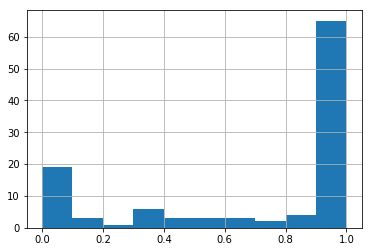

In [34]:
misrat_gtd.hist()

## Outliers

In [38]:
idx_gtd = gtd.dtypes[(gtd.dtypes == 'float64') |
              (gtd.dtypes == 'int64')].index                                   

nums = gtd.reindex(idx_gtd, axis=1)

#nums.drop(['eventid'], axis=1, inplace=True)

nums.dropna(axis=1, inplace=True, thresh=nums.shape[0] * 0.95)
nums.dropna(inplace=True)

iyear             AxesSubplot(0.125,0.855645;0.133621x0.0243548)
imonth         AxesSubplot(0.285345,0.855645;0.133621x0.0243548)
iday            AxesSubplot(0.44569,0.855645;0.133621x0.0243548)
extended       AxesSubplot(0.606034,0.855645;0.133621x0.0243548)
country        AxesSubplot(0.766379,0.855645;0.133621x0.0243548)
region            AxesSubplot(0.125,0.826419;0.133621x0.0243548)
latitude       AxesSubplot(0.285345,0.826419;0.133621x0.0243548)
longitude       AxesSubplot(0.44569,0.826419;0.133621x0.0243548)
specificity    AxesSubplot(0.606034,0.826419;0.133621x0.0243548)
vicinity       AxesSubplot(0.766379,0.826419;0.133621x0.0243548)
crit1             AxesSubplot(0.125,0.797194;0.133621x0.0243548)
crit2          AxesSubplot(0.285345,0.797194;0.133621x0.0243548)
crit3           AxesSubplot(0.44569,0.797194;0.133621x0.0243548)
multiple       AxesSubplot(0.606034,0.797194;0.133621x0.0243548)
success        AxesSubplot(0.766379,0.797194;0.133621x0.0243548)
suicide           AxesSub

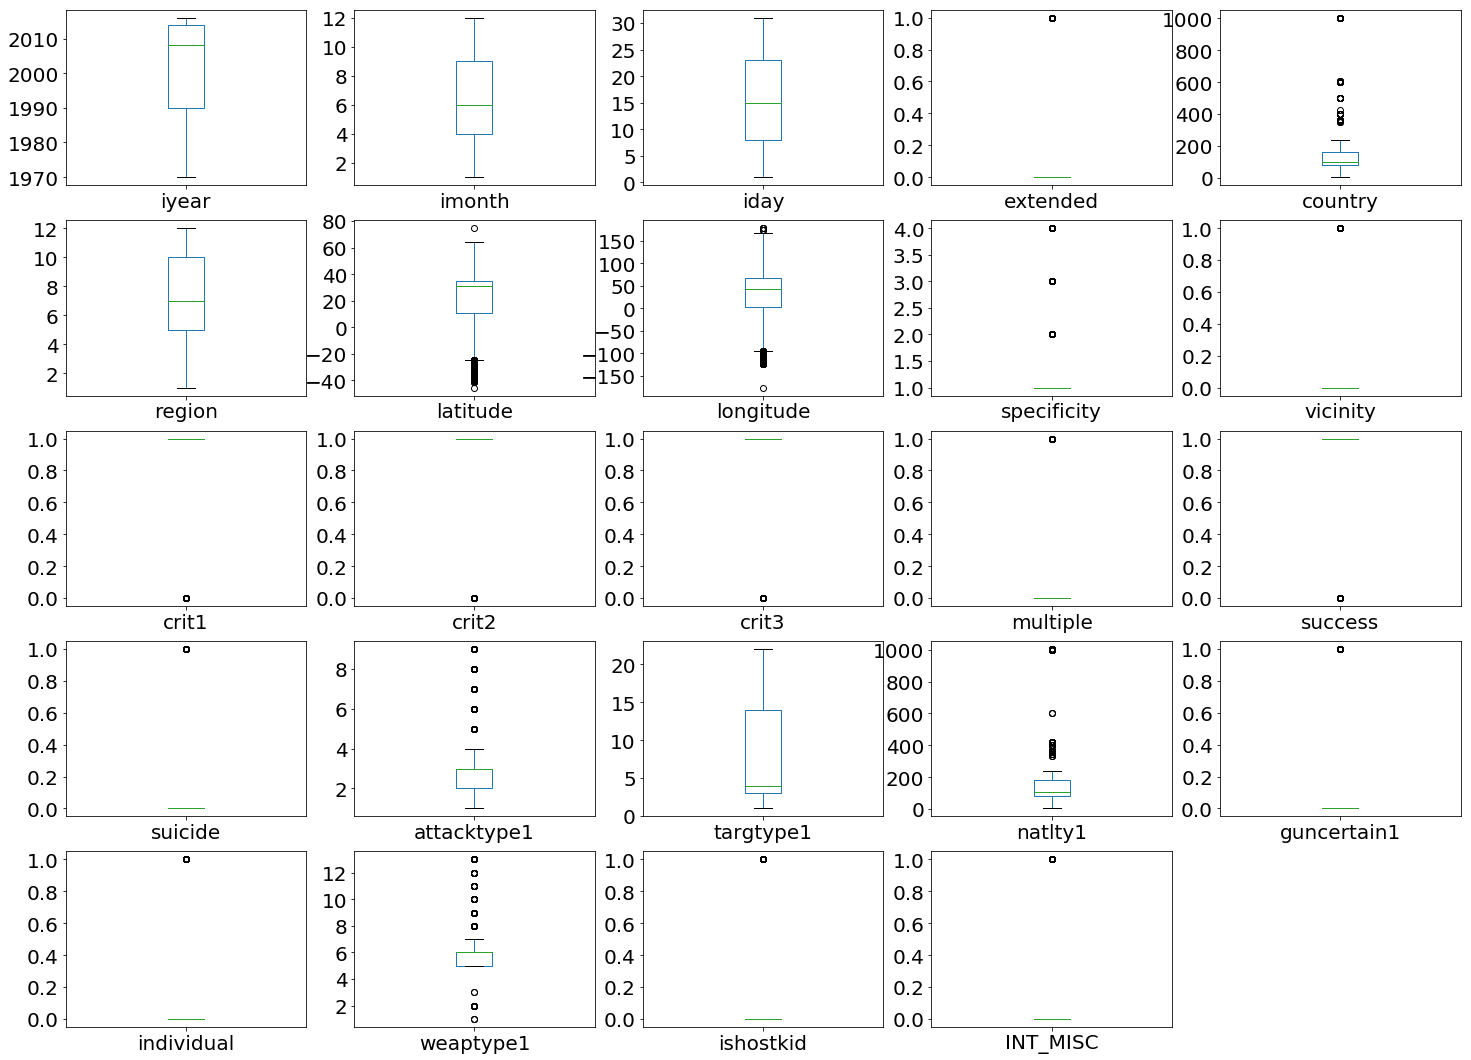

In [39]:
nums.plot(kind='box', subplots=True, layout=(26,5), figsize=(25, 100), fontsize=20)

In [44]:
clf = IsolationForest(max_samples='auto', random_state=2425, contamination=0.05, verbose=True, n_jobs=-1)

In [45]:
clf.fit(nums)
isof = clf.predict(nums)

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s finished


In [46]:
isofdf = pd.Series(isof)

In [48]:
nums['Outlier'] = isof

In [49]:
nums.Outlier.sample(30)

140859    1
18808     1
126188    1
87417     1
96757     1
72971     1
61466    -1
24186     1
54475     1
52691     1
44802     1
13586     1
89420     1
149143    1
98076     1
7409      1
145928    1
110524    1
21372     1
85640     1
86552     1
133142    1
135016    1
159316    1
119231    1
2144      1
58064     1
90213     1
117498    1
121281    1
Name: Outlier, dtype: int64

In [58]:
nums = nums[nums.Outlier != -1]
nums.drop(columns='Outlier', inplace=True)

In [59]:
nums.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'multiple', 'success', 'suicide', 'attacktype1', 'targtype1', 'natlty1',
       'guncertain1', 'individual', 'weaptype1', 'ishostkid', 'INT_MISC'],
      dtype='object')

In [60]:
nums.sample(30)

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,...,success,suicide,attacktype1,targtype1,natlty1,guncertain1,individual,weaptype1,ishostkid,INT_MISC
87451,2008,6.0,24.0,0,167,9,43.316667,45.683333,1.0,0.0,...,1,0,3,1,167.0,0.0,0,6,0.0,0.0
160755,2016,4.0,13.0,0,182,11,2.141958,45.116420,1.0,0.0,...,1,0,3,4,182.0,0.0,0,6,0.0,0.0
133526,2014,6.0,22.0,0,182,11,4.683333,46.616667,1.0,0.0,...,1,0,2,4,182.0,0.0,0,5,0.0,0.0
25404,1985,6.0,19.0,0,110,10,34.438094,35.830837,1.0,0.0,...,1,0,3,1,110.0,0.0,0,6,0.0,0.0
47294,1991,7.0,23.0,0,45,3,7.080710,-74.701010,1.0,0.0,...,1,0,3,4,45.0,0.0,0,6,0.0,0.0
83974,2007,8.0,25.0,0,182,11,2.037420,45.337971,1.0,0.0,...,1,0,3,3,182.0,0.0,0,6,0.0,0.0
170275,2016,12.0,29.0,0,137,11,-15.126635,39.268716,4.0,0.0,...,1,0,1,2,137.0,0.0,0,5,0.0,0.0
97111,2010,7.0,8.0,0,92,6,26.398022,90.269415,3.0,0.0,...,1,0,3,19,92.0,0.0,0,6,0.0,0.0
34778,1988,6.0,22.0,0,183,11,-26.177929,27.974858,1.0,0.0,...,1,0,3,14,183.0,0.0,0,6,0.0,0.0
75433,2003,5.0,6.0,0,92,6,34.043775,74.866795,1.0,0.0,...,1,0,3,3,92.0,1.0,0,6,0.0,0.0


# Data preprocessing

In the first round, we preprocess the data to create a viable minimum set, on which we start model testing. This consists of the following steps:
1. Dropping special attributes
* Excluding incidents with 'unknown' perpetrators
* Excluding 'unaffiliated' individuals
* Excluding the ambiguous cases
* Including only general names and only of the primary perpetrators (i.e. `gname`)
* Dropping all missing values
* Including only numerical values
* Excluding data before 2012
* Including only the top perpetrators responsible for 95% of total incidents

## Dropping special attributes

The special attributes of the dataset:
* eventid
* addnotes
* scite1
* scite2
* scite3
* dbsource



## Attribute specific changes

### Replacing 'in-built' missing values with numpy NaN

Marking missing values

## Preprocessing

In [ ]:
def preproc(data, 
            primonly=True, 
            period=(1, 5), 
            onlyknown=True, 
            nocat=True, 
            maxna=0.05,
            topincrat=1, 
            hideind=True, 
            hideuncert=False, 
            dropspec=True,
            dropres=True,
            miscodetonan=True):
    """
    Cleans and preprocesses dataset.
    
    Parameters:
    ===========
    
    `primonly`: boolean, True
    Includes only general perpetrator group names and only of the primary perpetrator (`gname`).
    
    `period`: tuple, (1, 5)
    Defines the included period by setting the start and end dates:
        '1': 1970
        '2': 1998
        '3': April 1 2008
        '4': 2012
        `5`: 2016
    
    `onlyknown`: boolean, True
    Shows only incidents where the perpetrators is identified (even if with doubt).
    
    `nocat`: boolean, True
    Excludes all categorical attributes from the dataset with the exception of the perpetrator group name
    attributes (`gname`:`gsubname3`).
    
    `maxna`: boolean, True
    The maximum allowed proportion of missing values within an attribute. Keeps only columns with missing 
    value ratio below the given threshold, but without the records (rows) containing the missing values.
    For instance, a value of '0.05' means that only columns with less than 5% of missing values are kept in the dataset.
    
    `topincrat`: float, 1
    Filters perpetrators based on their overall weight of contribution (in terms of number of incidents).
    The value is the ratio of total incidents for which the selected perpetrators are responsible.
    Perpetrators are ranked based on the number of incidents in which they are involved and the function calculates
    their cumulative contribution. It makes the selection at or right above the threshold.
    Example: '0.95' means selecting the perpetator groups with the highest incident ratio responsible together
    for 95% of the total incidents.
    
    `hideind`: boolean, True
    Hides individual perpetrators unaffiliated to groups.
    
    `hideuncert`: boolean, False
    Hides uncertain cases
        
    `dropspec`: boolean, True
    Drops special attributes.
    
    `dropres`: boolean, True
    Drops the `resolution` NaTType attribute.
    
    `miscodetonan`: boolean, True
    Transforms the original codes for missing values into numpy NaN.
    """
    procd = data.copy(deep=True)
    
    ## `dropspec`: Drop special attributes
    if dropspec == True:
        procd.drop(['eventid', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource'], axis=1, inplace=True)

    ## `miscodetonan`: Turn built-in missing codes into numpy NaN
    if miscodetonan == True:
        # The `miscodes` dictionary defines the attribute-missing value code pairs:
        miscodes = {"0": ['imonth', 'iday'], 
                    "-9": ['claim2', 'claimed', 'compclaim', 'doubtterr', 'INT_ANY', 'INT_IDEO', 'INT_LOG', 'INT_MISC', 
                           'ishostkid', 'ndays', 'nhostkid', 'nhostkidus', 'nhours', 'nperpcap', 'nperps', 'nreleased', 
                           'property', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'vicinity'], 
                    "-99": ['ransompaid', 'nperpcap', 'compclaim', 'nreleased', 'nperps', 'nhostkidus', 'ransomamtus', 
                            'ransomamt', 'nhours', 'ndays', 'propvalue', 'ransompaidus', 'nhostkid']}

        def mistonan(data, collist, nancode):
            """Replaces columns' missing value code with numpy NaN.

            Parameters:
            `data`: dataframe

            `nanvalue` : the code of the missing value in the columns
            """
            colstonan = []

            for col in collist:
                if col in data.columns:
                    colstonan.append(col)
                else:
                    print("'{}' is not among the dataframe's columns.".format(col))
            
            data[colstonan] = data[colstonan].apply(lambda x: x.replace(nancode, np.NaN))

        for key in miscodes.keys():
            mistonan(procd, miscodes[key], float(key))
        
        # Replaces "Unknown" values whenever it occurs except in the `gname` target attribute.
        # The function controls it by the `onlyknown` parameter.
        procd.drop(columns='gname').replace(to_replace='Unknown', value=np.NaN, inplace=True)
    
    ## Replace unknown, '0' days and months with a random value
    ### Months
    #tm = procd.imonth[procd.imonth == 0]
    #tm = tm.apply(lambda x: np.random.randint(1, 13))
    #procd.imonth[procd.imonth == 0] = tm

    ### Days
    #td = procd.iday[procd.iday == 0]
    #td = td.apply(lambda x: np.random. randint(1, 29))
    #procd.iday[procd.iday == 0] = td
    
    ## `period`: Filter the dataset for the choosen time period
    dates = [1970, 1997, 2008, 2012, 2016]
    
    predmin = dates[period[0]-1]
    predmax = dates[period[1]-1]
    
    if predmin == 2008:
        procd = procd[((procd.iyear > predmin ) & (procd.iyear < predmax + 1)) | 
                      ((procd.iyear == predmin) & (procd.imonth >= 3))]
    elif predmax == 2008:
        procd = procd[((procd.iyear >= predmin ) & (procd.iyear < predmax)) | 
                      ((procd.iyear == predmax) & (procd.imonth < 3))]
    else:
        procd = procd[(procd.iyear >= predmin) & (procd.iyear < predmax + 1)]
    
    # `onlyknown`: Show only known perpetrators
    if onlyknown == True:
        procd = procd[procd.gname != 'Unknown']
    
    # `hideind`: Hide unaffiliated individuals
    if hideind == True:
        procd = procd[procd.individual != 1]
    
    # `hideuncert`: Hide uncertain cases
    if hideuncert == True:
        procd = procd[(procd.guncertain1 != 1) |
                      (procd.guncertain2 != 1) |
                      (procd.guncertain3 != 1)]

    # `primonly`: Include only the primary perpetrator groups and only their main names.
    if primonly == True:
        procd.drop(columns=['gsubname','gname2','gsubname2','gname3','gsubname3'], axis=1, inplace=True)
        
    # `topincrat`: Set the threshold for the top frequent perpetrators to show.
    tempname = procd.gname
    idx_main_groups = tempname.value_counts()[tempname.value_counts(normalize=True).cumsum() <= topincrat].index
    procd = procd[procd.gname.isin(idx_main_groups)]
    
    # Dropping polynomial attributes (except `gname`)
    if nocat == True:
        idx_nonobj = procd.dtypes[(procd.dtypes.index.isin(['gname',
                                                            'gsubname',
                                                            'gname2',
                                                            'gsubname2',
                                                            'gname3',
                                                            'gsubname3'])) |
                                   (procd.dtypes != 'object')].index
                                   
        procd = procd.reindex(idx_nonobj, axis=1)

    # Drop the `resolution` attribute
    if dropres == True:
        procd.drop(columns='resolution', inplace=True)
        
    #print(procd)
    
    # Drop missing values
    procd.dropna(axis=1, inplace=True, thresh=procd.shape[0] * (1 - maxna))
    procd.dropna(inplace=True)
    
    # Drop correlated values
    #procd = dropcors(procd, corthr)

    print(procd.info(verbose=True))
    return procd

In [ ]:
moddat = gtd.copy(deep=True)
moddat = preproc(moddat, 
               primonly=True, 
               period=(1, 5), 
               onlyknown=True, 
               nocat=True, 
               maxna=0.05, 
               topincrat=0.95, 
               hideind=False, 
               hideuncert=False, 
               dropspec=True,
               dropres=True,
               miscodetonan=False)

### Correlated attributes

In [36]:
def cors(data, threshold=0.5, sort=False):
    """Lists correlation pairs and their correlation values above a correlation threshold.
    
    `data`: DataFrame
    
    `threshold`: The correlation value above which it shows the correlation pairs.
    
    `paired`: True
    Organizes the correlation pairs according to attributes.
    If False, it shows the correlation pairs values in the descending order.
    """
    
    corrs = data.corr()
    
    cri_hi = abs(corrs < 1) & abs(corrs >= threshold)
    corr_hi = corrs[cri_hi].stack().reset_index()
    corr_hi.columns = ['first', 'second', 'corr']
    
    if sort == True:
        output = corr_hi.sort_values(by='corr', ascending=False)
    else: 
        output = corrs[cri_hi].stack()
    
    return output

In [ ]:
corpair = cors(moddat, 0.7, sort=True)
corpair

In [ ]:
moddat.drop(columns=['extended', 'targsubtype1'], inplace=True)

# Modeling

In [ ]:
X = moddat.drop(['gname'], axis=1).dropna(axis=1)
X.dropna(axis=1, inplace=True)
print(X.shape)

In [ ]:
scaler = Normalizer().fit(X)
X = scaler.transform(X)

In [ ]:
y = moddat.gname
y.dropna(inplace=True)
y.fillna("NaN", inplace=True)
y.shape

In [ ]:
validation_size = 0.2
seed = 17

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

In [ ]:
results = []
names = []

In [ ]:
kfold = KFold(n_splits=10, random_state=seed)

## Trying models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hinge_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import fbeta_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import zero_one_loss

## Decisions tree

In [ ]:
models = {"Decisiong Tree Classifier": DecisionTreeClassifier(),
          "K-Neighbors Classifier": KNeighborsClassifier(), 
          "Linear Discriminant Analysis": LinearDiscriminantAnalysis()}

# "Logistic Regression": LogisticRegression()

In [ ]:
def predict_groups(models, X_train, y_train):
    for model in models:
        #print("\n{}:\n\n{}\n".format(model, models[model]))
          
        model_score = cross_val_score(models[model], X_train, y_train, cv=kfold, scoring='accuracy')
        print("\n{}:\n\tAccuracy: {} ({})".format(model, model_score.mean(), model_score.std()))
        
        model_score = cross_val_score(models[model], X_train, y_train, cv=kfold, scoring='f1_micro')
        print("\tF1 micro: {} ({})".format(model_score.mean(), model_score.std()))
        
        #crosval = cross_validate(model, X, y, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])
    

In [ ]:
predict_groups(models, X_train, y_train)

## Logistic regression

# Possible enhancements of the model

## Target variables
* Taking into account information about second and third perpetrators.
* Taking into account subname information.

## Data preprocessing
* Identifying the strongest predictor attributes in the dataset and trying to predict those with date we excluded now (e.g. records with 'Unknown' perpetrators).
* Handling imbalanced features, most importantly dates

## Models tuning
* Tuning model hyperparameters (e.g. with grid or random search)
